Libraries 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Standard Scaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Regression 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor  
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn import tree

### Model Evaluation Metrices
from sklearn import metrics

sns.set_style('darkgrid')

In [0]:
# Loading Training file

mark0 = pd.read_csv('train.csv')
mark0.head()

,ID,Page likes,Page Checkins,Page talking about,Page Category,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,CC1,CC2,CC3,CC4,CC5,Base Time,Post Length,Post Share Count,Post Promotion Status,H local,Post published weekday,Base DateTime weekday,Comments
0,162283,32745.0,1559.0,770.0,NaN,0,15,1.376884,0.0,2.368908,0.0,15,0.577889,0.0,1.573242,0.0,8,0.472362,0.0,1.226995,0.0,15,1.236181,0.0,2.225819,-7.0,15,0.105528,0.0,1.763368,0.0,0,0,0.0,0.0,55,0,2,0,24,Tuesday,Thursday,0
1,162282,8415.0,0.0,5.0,16.0,0,4,0.531915,0.0,1.068924,0.0,3,0.085106,0.0,0.453346,0.0,2,0.212766,0.0,0.502596,0.0,4,0.531915,0.0,1.068924,-2.0,2,-0.127660,0.0,0.605543,1.0,0,1,1.0,-1.0,27,110,1,0,24,Wednesday,Thursday,0
2,162281,326835.0,0.0,92354.0,18.0,0,589,86.147368,49.0,106.477571,0.0,491,33.410526,8.0,71.756679,0.0,467,31.221053,4.0,66.199885,0.0,534,81.000000,43.0,99.935242,-345.0,491,2.189474,-3.0,94.626612,194.0,31,163,180.0,-132.0,42,11,28,0,24,Friday,Sunday,6
3,162280,3280313.0,1.0,39324.0,14.0,0,742,187.524752,143.0,152.987581,0.0,742,87.207921,27.0,146.275091,0.0,411,50.504950,12.0,82.010700,0.0,742,179.366337,139.0,148.344309,-367.0,742,36.702970,-9.0,181.676110,725.0,725,0,725.0,725.0,12,27,167,0,24,Sunday,Monday,117
4,162279,10145.0,6.0,15.0,19.0,0,2,0.309524,0.0,0.555839,0.0,1,0.047619,0.0,0.212959,0.0,2,0.214286,0.0,0.464743,0.0,2,0.309524,0.0,0.555839,-2.0,1,NaN,0.0,0.530798,0.0,0,0,0.0,0.0,6,135,5,0,24,Thursday,Thursday,0


Visvulizing Nulls

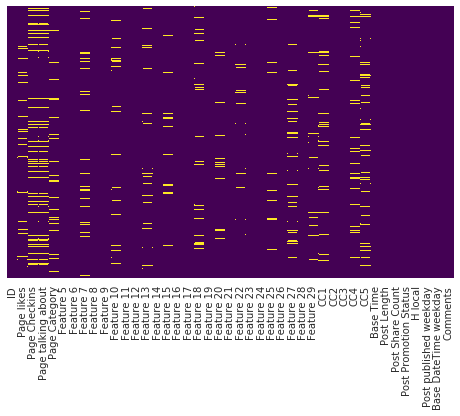

In [0]:
plt.figure(figsize=(8,5))
sns.heatmap(mark0.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
print(((mark0.isnull().sum())/mark0.shape[0])*100)

ID                        0.000000
Page likes                9.761025
Page Checkins             9.917292
Page talking about        9.917292
Page Category             9.223616
Feature 5                 0.000000
Feature 6                 0.000000
Feature 7                 5.084423
Feature 8                 0.000000
Feature 9                 0.000000
Feature 10                4.958646
Feature 11                0.000000
Feature 12                0.000000
Feature 13                4.985326
Feature 14                0.000000
Feature 15                5.172085
Feature 16                0.000000
Feature 17                0.000000
Feature 18                4.954835
Feature 19                0.000000
Feature 20                4.943401
Feature 21                0.000000
Feature 22                4.901475
Feature 23                0.000000
Feature 24                0.000000
Feature 25                4.840492
Feature 26                0.000000
Feature 27                4.893852
Feature 28          

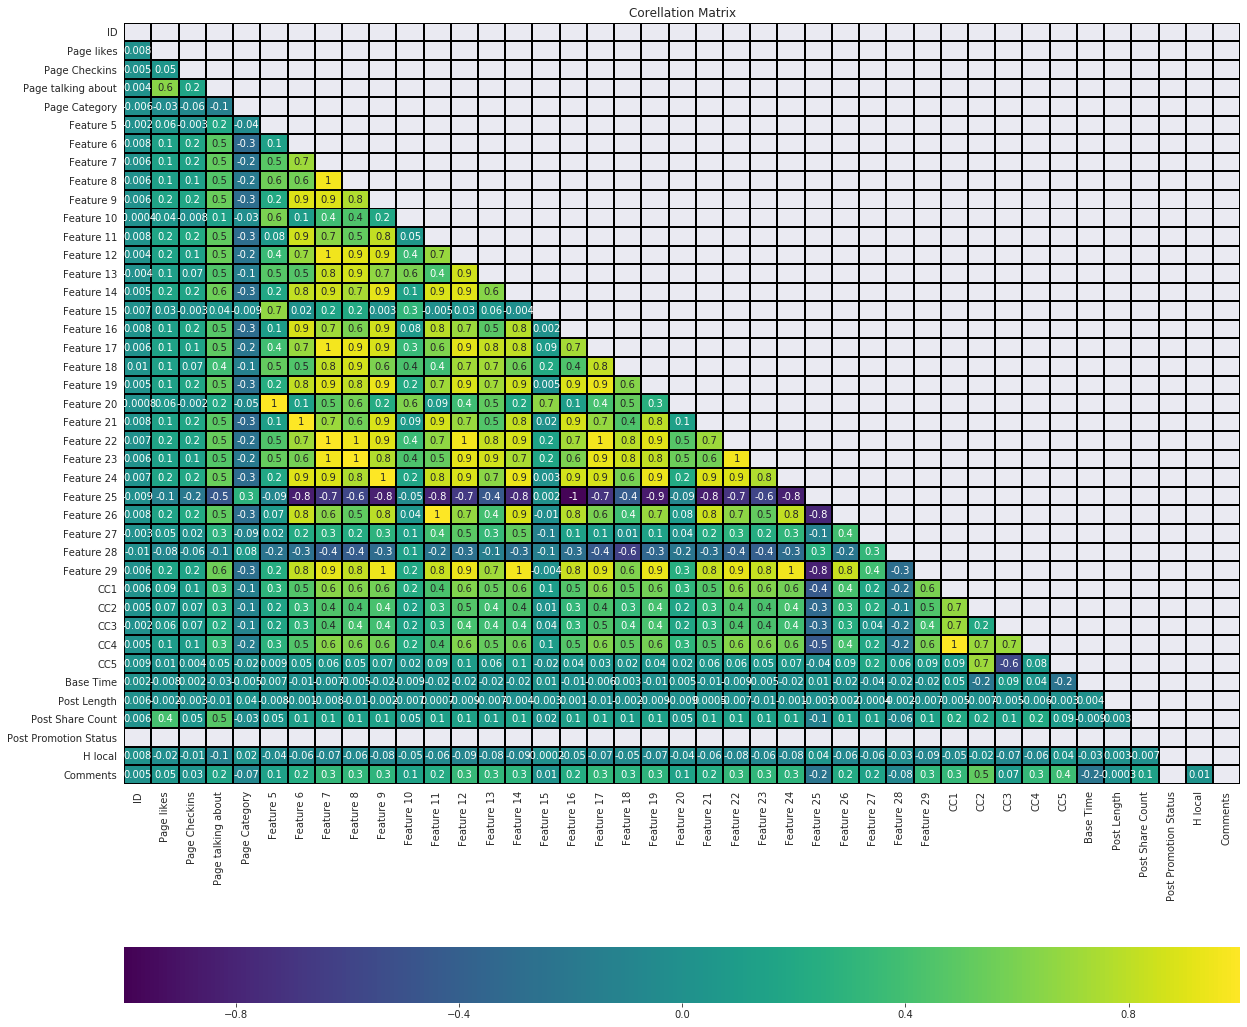

In [0]:
# Checking corellation between various features

plt.figure(figsize=(20,20))
plt.title('Corellation Matrix')
matrix = np.triu(mark0.corr())
sns.heatmap(mark0.corr(),vmin=-1,vmax=+1,center=0,fmt='.1g',linewidths=1, linecolor='black',cmap='viridis',annot=True,cbar_kws= {'orientation': 'horizontal'}, mask=matrix)

Feature Engineering

In [0]:
# Removing Highly Corelated Features

mark1 = mark0


In [0]:
mark1.drop(['Feature 8','Feature 9','Feature 11','Feature 12','Feature 13','Feature 14','Feature 16',
                    'Feature 17','Feature 18','Feature 19','Feature 20','Feature 21','Feature 22','Feature 23',
                    'Feature 24','Feature 26','Feature 29','CC4'], axis=1,inplace=True)

In [0]:
# Missing value treatment - using mode

mark1['Page likes'].fillna(mark1['Page likes'].mean(),inplace=True)
mark1['Page Checkins'].fillna(mark1['Page Checkins'].mean(),inplace=True)
mark1['Page talking about'].fillna(mark1['Page talking about'].mean(),inplace=True)
mark1['Page Category'].fillna(mark1['Page Category'].mean(),inplace=True)
mark1['Feature 7'].fillna(mark1['Feature 7'].mean(),inplace=True)
mark1['Feature 10'].fillna(mark1['Feature 10'].mean(),inplace=True)
mark1['Feature 15'].fillna(mark1['Feature 15'].mean(),inplace=True)
mark1['Feature 25'].fillna(mark1['Feature 25'].mean(),inplace=True)
mark1['Feature 27'].fillna(mark1['Feature 27'].mean(),inplace=True)
mark1['CC1'].fillna(mark1['CC1'].mean(),inplace=True)
mark1['CC5'].fillna(mark1['CC5'].mean(),inplace=True)
#mark1[''].fillna(mark1[''].mean(),inplace=True)

In [0]:
mark1.drop('ID',axis=1,inplace=True)

In [0]:
mark1.tail(10)

,Page likes,Page Checkins,Page talking about,Page Category,Feature 5,Feature 6,Feature 7,Feature 10,Feature 15,Feature 25,Feature 27,Feature 28,CC1,CC2,CC3,CC5,Base Time,Post Length,Post Share Count,Post Promotion Status,H local,Post published weekday,Base DateTime weekday,Comments
26227,1.345702e+06,40729.0,102442.0,9.000000,0,740,60.612150,0.0000,0.0,-494.0,5.827103,-2.0,57.0,0,16,-16.0,64,178,32,0,24,Saturday,Tuesday,0
26228,1.143030e+05,0.0,41419.0,24.000000,0,1239,82.384615,0.0000,0.0,-304.0,-8.061538,-4.0,118.0,72,46,26.0,25,106,11,0,24,Friday,Saturday,8
26229,2.955000e+03,5228.0,129.0,32.000000,0,3,0.666667,0.0000,0.0,0.0,0.555556,0.0,1.0,1,0,1.0,1,1582,5,0,24,Sunday,Sunday,1
26230,4.130950e+05,0.0,19301.0,24.000000,0,331,36.851064,0.0000,0.0,-190.0,-2.157447,-2.0,52.0,1,24,-23.0,54,73,31,0,24,Sunday,Tuesday,0
26231,3.280313e+06,1.0,39324.0,14.000000,0,742,187.524752,0.0000,0.0,-367.0,36.702970,-9.0,31.0,31,0,31.0,9,237,24,0,24,Tuesday,Tuesday,18
26232,1.736500e+04,0.0,3447.0,24.414368,0,68,3.655172,0.0000,0.0,-48.0,-1.218391,0.0,0.0,0,0,0.0,52,53,1,0,24,Saturday,Monday,0
26233,1.548000e+03,0.0,581.0,16.000000,0,173,8.071429,0.0000,0.0,-40.0,1.028571,0.0,2.0,2,0,2.0,13,39,1,0,24,Tuesday,Wednesday,0
26234,3.760000e+02,0.0,0.0,24.000000,2,3,2.500000,2.0000,0.0,2.0,2.500000,2.5,3.0,3,0,3.0,20,111,2,0,24,Wednesday,Thursday,0
26235,1.156690e+05,0.0,745.0,1.000000,0,26,1.691892,0.1876,0.0,-12.0,0.016216,0.0,0.0,0,0,0.0,1,158,1,0,24,Friday,Friday,0
26236,5.861927e+06,0.0,29355.0,22.000000,0,731,36.750000,0.0000,0.0,-513.0,5.065789,0.0,3.0,0,3,-3.0,37,202,3,0,24,Monday,Tuesday,0


In [0]:
# Normalizing
mark2 = mark1
mark3 = mark2
mark3.head(1)


,Page likes,Page Checkins,Page talking about,Page Category,Feature 5,Feature 6,Feature 7,Feature 10,Feature 15,Feature 25,Feature 27,Feature 28,CC1,CC2,CC3,CC5,Base Time,Post Length,Post Share Count,Post Promotion Status,H local,Post published weekday,Base DateTime weekday,Comments
0,32745.0,1559.0,770.0,24.414368,0,15,1.376884,0.0,0.0,-7.0,0.105528,0.0,0.0,0,0,0.0,55,0,2,0,24,Tuesday,Thursday,0


In [0]:
robb = mark3[['Post Promotion Status','Post published weekday','Base DateTime weekday','Comments']]

In [0]:
mark3.drop(['Post Promotion Status','Post published weekday','Base DateTime weekday','Comments'],axis=1,inplace=True)

In [0]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(mark3)

df_norm = pd.DataFrame(x_scaled)

In [0]:
df_norm.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000067,0.008365,1.264380e-04,0.222994,0.0,0.006408,0.000588,0.0,0.0,0.777905,0.247917,0.307364,0.000000,0.000000,0.000000,0.396517,0.763889,0.000000,0.000007,1.0
1,0.000017,0.000000,8.210259e-07,0.142857,0.0,0.001709,0.000227,0.0,0.0,0.780767,0.247643,0.307364,0.000427,0.000000,0.000628,0.396226,0.375000,0.005121,0.000000,1.0
2,0.000671,0.000000,1.516500e-02,0.161905,0.0,0.251602,0.036799,0.0,0.0,0.584430,0.250370,0.304162,0.082871,0.014911,0.102387,0.358200,0.583333,0.000512,0.000186,1.0
3,0.006736,0.000005,6.457204e-03,0.123810,0.0,0.316959,0.080105,0.0,0.0,0.571837,0.290998,0.297759,0.309697,0.348725,0.000000,0.606967,0.166667,0.001257,0.001146,1.0
4,0.000021,0.000032,2.463078e-06,0.171429,0.0,0.000854,0.000132,0.0,0.0,0.780767,0.250701,0.307364,0.000000,0.000000,0.000000,0.396517,0.083333,0.006285,0.000028,1.0


In [0]:
mark1.head(3)

,Page likes,Page Checkins,Page talking about,Page Category,Feature 5,Feature 6,Feature 7,Feature 10,Feature 15,Feature 25,Feature 27,Feature 28,CC1,CC2,CC3,CC5,Base Time,Post Length,Post Share Count,Post Promotion Status
0,32745.0,1559.0,770.0,24.414368,0,15,1.376884,0.0,0.0,-7.0,0.105528,0.0,0.0,0,0,0.0,55,0,2,0
1,8415.0,0.0,5.0,16.000000,0,4,0.531915,0.0,0.0,-2.0,-0.127660,0.0,1.0,0,1,-1.0,27,110,1,0
2,326835.0,0.0,92354.0,18.000000,0,589,86.147368,0.0,0.0,-345.0,2.189474,-3.0,194.0,31,163,-132.0,42,11,28,0


In [0]:
# Renaming column values, PPW = Post published weekday, BDW = Base DateTime weekday

robb['Post published weekday'] = robb['Post published weekday'].replace(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday',
                                                                           'Synday'],['MON_PPW','TUE_PPW','WED_PPW','THR_PPW','FRI_PPW',
                                                                                      'SAT_PPW','SUN_PPW'])

robb['Base DateTime weekday'] = robb['Base DateTime weekday'].replace(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday',
                                                                           'Synday'],['MON_BDW','TUE_BDW','WED_BDW','THR_BDW','FRI_BDW',
                                                                                      'SAT_BDW','SUN_BDW'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
# One Hot Encoding on Days

hot = robb[['Post published weekday','Base DateTime weekday']]
dum = pd.get_dummies(hot,drop_first=True)

robb.drop(['Post published weekday','Base DateTime weekday'],axis=1,inplace=True)
robb = pd.concat([robb, dum,df_norm], axis=1)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
robb.head(1)

,Post Promotion Status,Comments,Post published weekday_MON_PPW,Post published weekday_SAT_PPW,Post published weekday_Sunday,Post published weekday_THR_PPW,Post published weekday_TUE_PPW,Post published weekday_WED_PPW,Base DateTime weekday_MON_BDW,Base DateTime weekday_SAT_BDW,Base DateTime weekday_Sunday,Base DateTime weekday_THR_BDW,Base DateTime weekday_TUE_BDW,Base DateTime weekday_WED_BDW,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.000067,0.008365,0.000126,0.222994,0.0,0.006408,0.000588,0.0,0.0,0.777905,0.247917,0.307364,0.0,0.0,0.0,0.396517,0.763889,0.0,0.000007,1.0


In [0]:
foxtrot = robb

In [0]:
# Test Train Split

X_train, X_test, y_train, y_test = train_test_split(foxtrot.drop('Comments',axis=1), 
                                                    foxtrot['Comments'], test_size=0.30, 
                                                    random_state=101)

Linear Regression

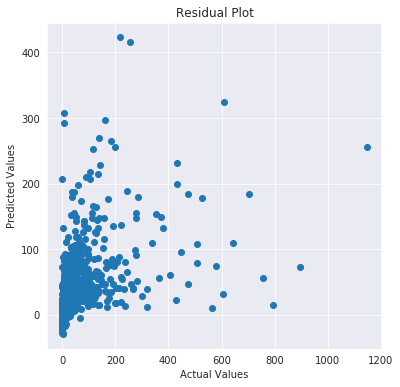

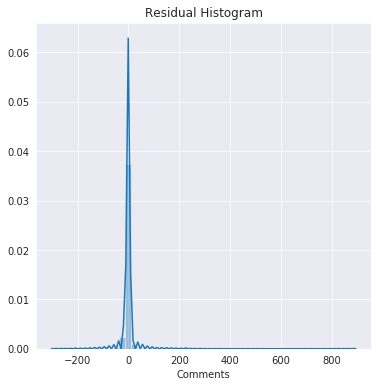



Regression Evaluation Metrices
Train Score: 0.29178237561414466
Test Score: 0.3154890598548016
MAE: 9.299743467275976
MSE: 1067.0608406256802
RMSE: 32.66589721139893


In [0]:
# Fitting the Model
lm = LinearRegression()
lm.fit(X_train,y_train)
# Predictions
predictions = lm.predict(X_test)
# Residual Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
print("\n")
# Residual Histogram
plt.figure(figsize=(6,6))
sns.distplot((y_test-predictions),bins=50)
plt.title('Residual Histogram')
plt.show()
print("\n")
# Error Values
print('Regression Evaluation Metrices')
#print('R square:', lm.r2_score(X_test,y_test))
print('Train Score:', lm.score(X_train,y_train))
print('Test Score:', lm.score(X_test,y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Decision Tree

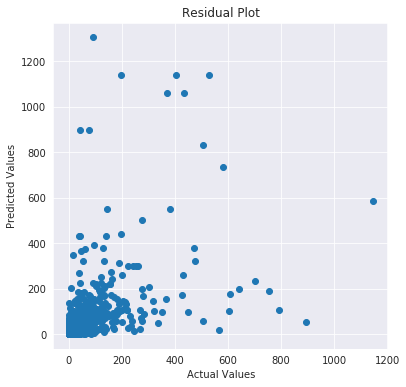

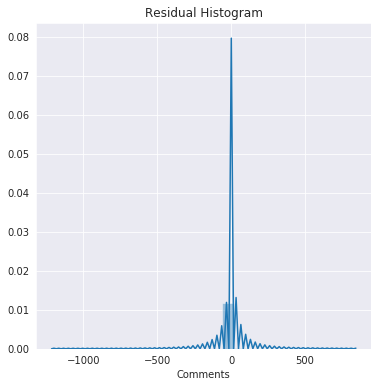



Regression Evaluation Metrices
Train Score: 1.0
Test Score: -0.012654532093069104
MAE: 6.528963414634147
MSE: 1578.5927337398373
RMSE: 39.7315080728109


In [0]:
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X_train, y_train)
# Predictions
predictions = regressor.predict(X_test)
# Residual Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
print("\n")
# Residual Histogram
plt.figure(figsize=(6,6))
sns.distplot((y_test-predictions),bins=25)
plt.title('Residual Histogram')
plt.show()
print("\n")
# Error Values
print('Regression Evaluation Metrices')
print('Train Score:', regressor.score(X_train,y_train))
print('Test Score:', regressor.score(X_test,y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Random Forest

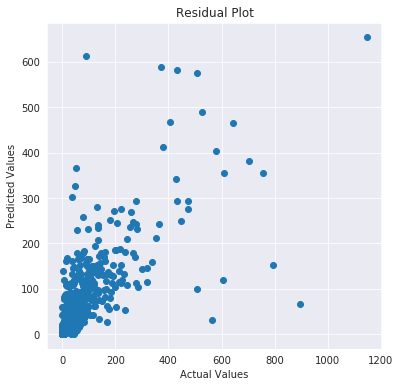

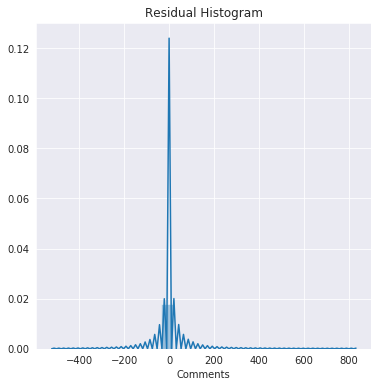



Regression Evaluation Metrices
Train Score: 0.9435821046226784
Test Score: 0.6374071068103768
MAE: 4.364493140243902
MSE: 565.2337380170223
RMSE: 23.77464485574963


In [0]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)
# Predictions
predictions = rf.predict(X_test)
# Residual Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
print("\n")
# Residual Histogram
plt.figure(figsize=(6,6))
sns.distplot((y_test-predictions),bins=25)
plt.title('Residual Histogram')
plt.show()
print("\n")
# Error Values
print('Regression Evaluation Metrices')
print('Train Score:', rf.score(X_train,y_train))
print('Test Score:', rf.score(X_test,y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Lasso

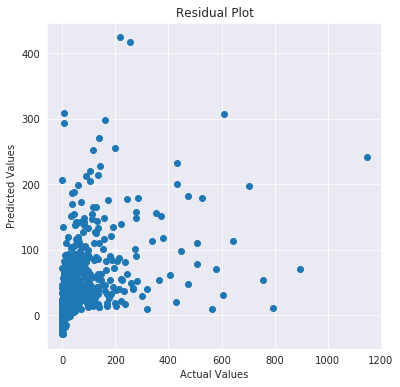

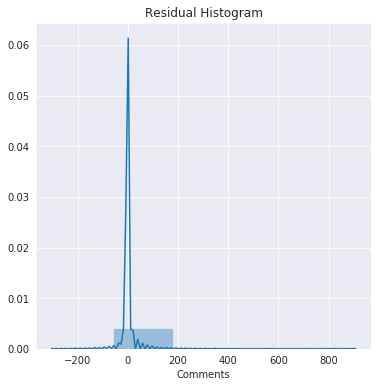



Regression Evaluation Metrices
Train Score: 0.29063738128042294
Test Score: 0.3145424842596969
MAE: 9.220000762614998
MSE: 1068.5364251503247
RMSE: 32.68847541795617


In [0]:
lasso = Lasso()
lasso.fit(X_train,y_train)
# Predictions
predictions = lasso.predict(X_test)
# Residual Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
print("\n")
# Residual Histogram
plt.figure(figsize=(6,6))
sns.distplot((y_test-predictions),bins=5)
plt.title('Residual Histogram')
plt.show()
print("\n")
# Error Values
print('Regression Evaluation Metrices')
print('Train Score:', lasso.score(X_train,y_train))
print('Test Score:', lasso.score(X_test,y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Bagging Regressor

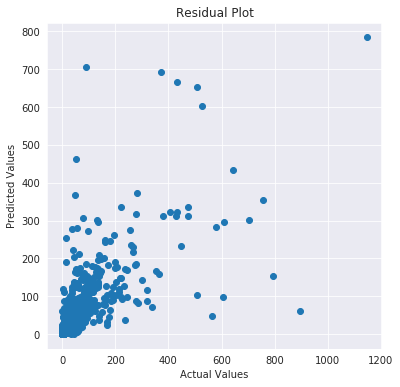

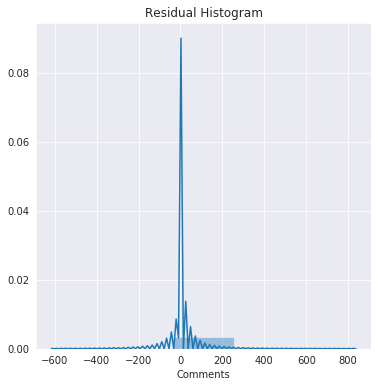



Regression Evaluation Metrices
Train Score: 0.9108737348315856
Test Score: 0.5802222224657363
MAE: 4.713147865853658
MSE: 654.3773107215447
RMSE: 25.580799649767496


In [0]:
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
model.fit(X_train, y_train)
# Predictions
predictions = model.predict(X_test)
# Residual Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
print("\n")
# Residual Histogram
plt.figure(figsize=(6,6))
sns.distplot((y_test-predictions),bins=5)
plt.title('Residual Histogram')
plt.show()
print("\n")
# Error Values
print('Regression Evaluation Metrices')
print('Train Score:', model.score(X_train,y_train))
print('Test Score:', model.score(X_test,y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Gradient Boosting

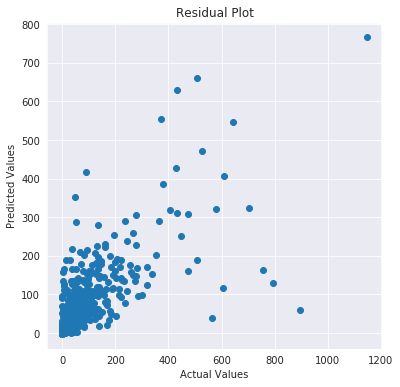

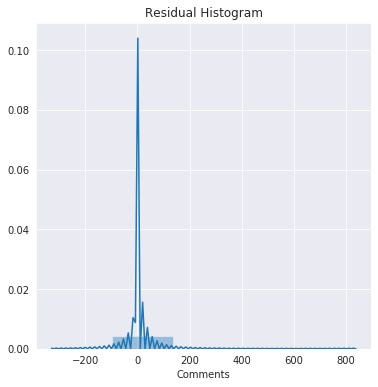



Regression Evaluation Metrices
Train Score: 0.8111805562356512
Test Score: 0.6329174816518416
MAE: 4.755965495854636
MSE: 572.2324620910957
RMSE: 23.921380856695873


In [0]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
# Predictions
predictions = model.predict(X_test)
# Residual Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
print("\n")
# Residual Histogram
plt.figure(figsize=(6,6))
sns.distplot((y_test-predictions),bins=5)
plt.title('Residual Histogram')
plt.show()
print("\n")
# Error Values
print('Regression Evaluation Metrices')
print('Train Score:', model.score(X_train,y_train))
print('Test Score:', model.score(X_test,y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

XGB

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:43:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


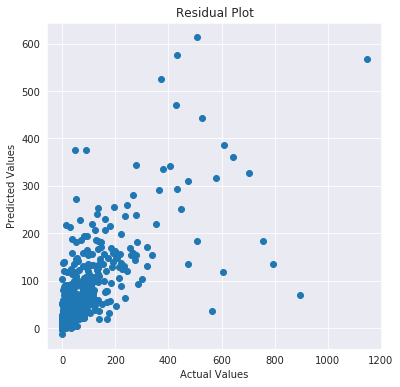

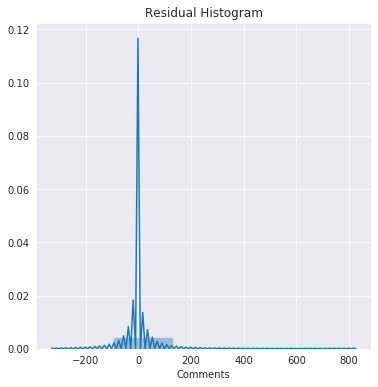



Regression Evaluation Metrices
Train Score: 0.7921377095373507
Test Score: 0.6218956562108149
MAE: 4.821999050165731
MSE: 589.414011180489
RMSE: 24.277850217440772


In [0]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
# Predictions
predictions = model.predict(X_test)
# Residual Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
print("\n")
# Residual Histogram
plt.figure(figsize=(6,6))
sns.distplot((y_test-predictions),bins=5)
plt.title('Residual Histogram')
plt.show()
print("\n")
# Error Values
print('Regression Evaluation Metrices')
print('Train Score:', model.score(X_train,y_train))
print('Test Score:', model.score(X_test,y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

SVR

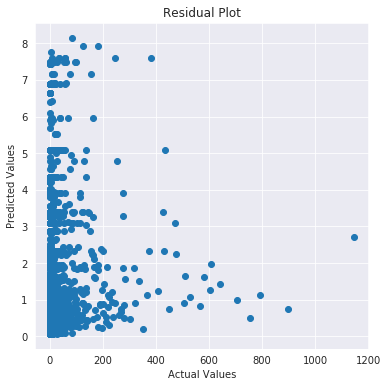

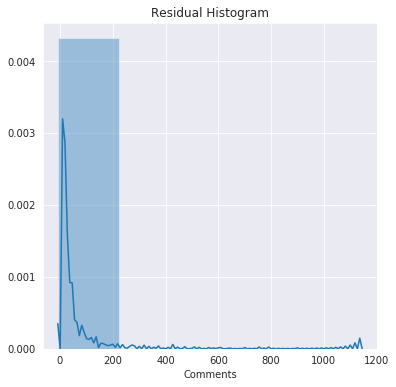



Regression Evaluation Metrices
Train Score: -0.025712754227269263
Test Score: -0.025125432437089753
MAE: 7.813078788334116
MSE: 1598.033196446872
RMSE: 39.97540739563353


In [0]:
model = SVR()
model.fit(X_train, y_train)
# Predictions
predictions = model.predict(X_test)
# Residual Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
print("\n")
# Residual Histogram
plt.figure(figsize=(6,6))
sns.distplot((y_test-predictions),bins=5)
plt.title('Residual Histogram')
plt.show()
print("\n")
# Error Values
print('Regression Evaluation Metrices')
print('Train Score:', model.score(X_train,y_train))
print('Test Score:', model.score(X_test,y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))